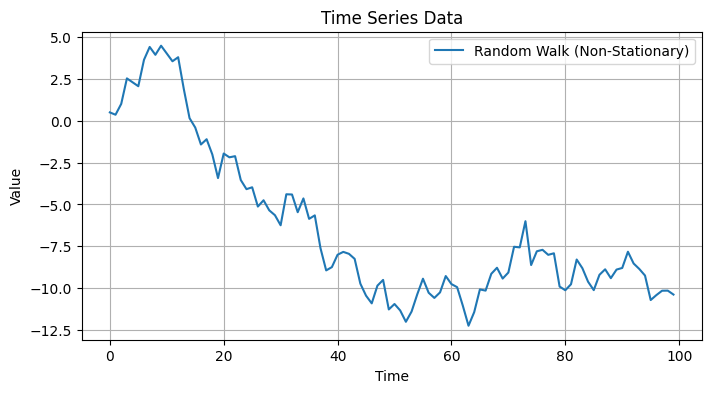

ADF Statistic: -1.3583317659818992
p-value: 0.6020814791099098
Critical Values: {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}
The time series is NOT stationary (Fail to reject H0)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Generate non-stationary sample data (random walk)
np.random.seed(42)
time = np.arange(100)
values = np.cumsum(np.random.randn(100))  # Random walk

# Function to check stationarity using ADF test
def check_stationarity(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("The time series is stationary (Reject H0)")
    else:
        print("The time series is NOT stationary (Fail to reject H0)")

# Plot the time series data
plt.figure(figsize=(8, 4))
plt.plot(time, values, label="Random Walk (Non-Stationary)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Time Series Data")
plt.legend()
plt.grid()
plt.show()

# Check stationarity
check_stationarity(values)


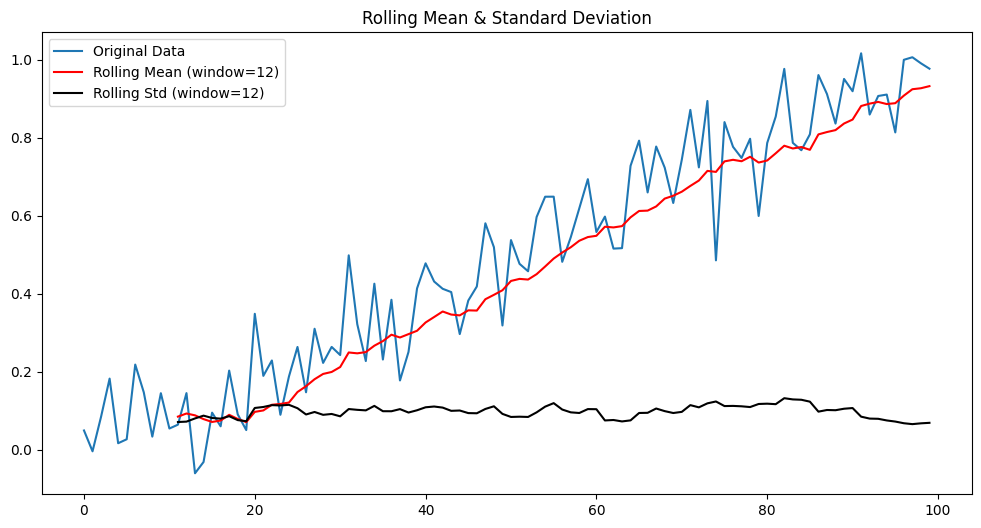


Augmented Dickey-Fuller Test:
ADF Statistic: -0.14542254502388555
p-value: 0.9447220932126503
Critical Values: {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}
Weak evidence against the null hypothesis. Data is non-stationary.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

def plot_rolling_statistics(timeseries, window=12):
    """Plot rolling mean and standard deviation"""
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()

    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original Data')
    plt.plot(rolling_mean, label=f'Rolling Mean (window={window})', color='red')
    plt.plot(rolling_std, label=f'Rolling Std (window={window})', color='black')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

def adf_test(timeseries):
    """Perform Augmented Dickey-Fuller test"""
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis. Data is stationary.")
    else:
        print("Weak evidence against the null hypothesis. Data is non-stationary.")

# Example usage
if __name__ == "__main__":
    # Generate example time series data
    np.random.seed(42)
    n = 100
    trend = np.linspace(0, 1, n)  # Linear trend
    noise = np.random.normal(0, 0.1, n)  # Gaussian noise
    data = trend + noise
    ts = pd.Series(data)

    plot_rolling_statistics(ts)
    print("\nAugmented Dickey-Fuller Test:")
    adf_test(ts)

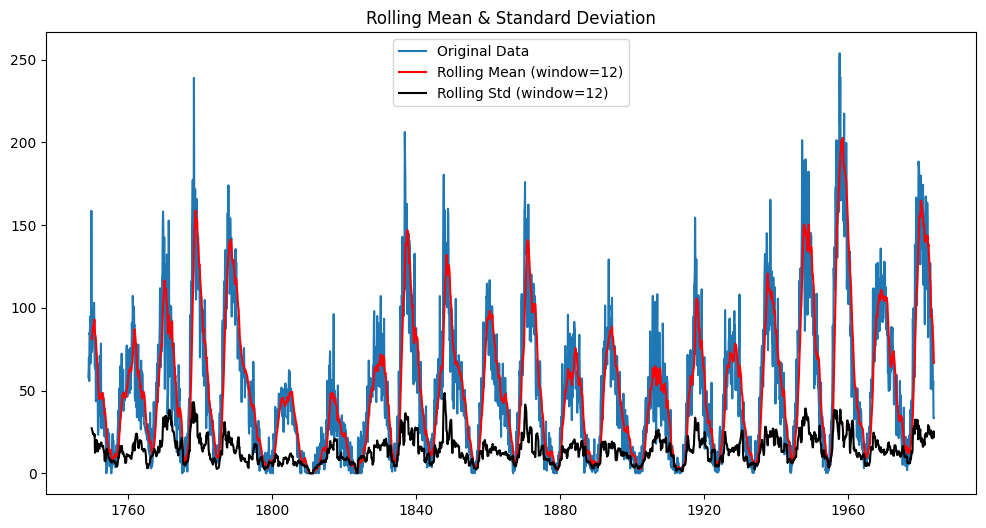


ADF Test:
ADF Statistic: -9.567667511913076
p-value: 2.333452143866306e-16
Critical Values: {'1%': -3.432694313168895, '5%': -2.862575752726396, '10%': -2.5673213632123297}
Strong evidence against the null hypothesis. Data is stationary.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

def plot_rolling_statistics(timeseries, window=12):
    """Plot rolling mean and standard deviation"""
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()

    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original Data')
    plt.plot(rolling_mean, label=f'Rolling Mean (window={window})', color='red')
    plt.plot(rolling_std, label=f'Rolling Std (window={window})', color='black')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

def adf_test(timeseries):
    """Perform Augmented Dickey-Fuller test"""
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis. Data is stationary.")
    else:
        print("Weak evidence against the null hypothesis. Data is non-stationary.")


# Example usage
if __name__ == "__main__":
    # Load dataset (Example: Monthly Sunspots dataset)
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
    df = pd.read_csv(url, index_col='Month', parse_dates=True)
    ts = df['Sunspots']

    plot_rolling_statistics(ts)
    print("\nADF Test:")
    adf_test(ts)



         Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-23  Afghanistan          0          0       0
2  2020-01-24  Afghanistan          0          0       0
3  2020-01-25  Afghanistan          0          0       0
4  2020-01-26  Afghanistan          0          0       0


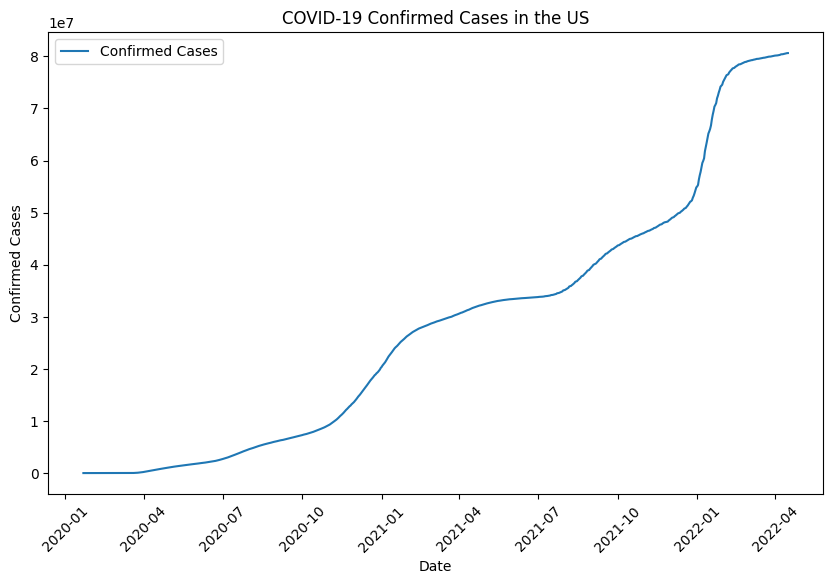

ADF Statistic: 0.577730
p-value: 0.987054
Critical Values:
	1%: -3.4386126789104074
	5%: -2.865186972298872
	10%: -2.5687119871327146

The data is likely non-stationary (p-value >= 0.05).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Step 1: Import the data from GitHub
# Let's use a sample COVID-19 dataset available on GitHub
url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'

# Load the data into a DataFrame
df = pd.read_csv(url)

# Step 2: Check the structure of the data
print(df.head())  # Look at the first few rows to understand the structure

# We can filter for a specific country, e.g., 'US' for United States
df_country = df[df['Country'] == 'US']

# Step 3: Visualize the time series for confirmed COVID cases in the US
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_country['Date']), df_country['Confirmed'], label='Confirmed Cases')
plt.title('COVID-19 Confirmed Cases in the US')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Step 4: Perform Augmented Dickey-Fuller (ADF) Test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

    # Interpret the result
    if result[1] < 0.05:
        print("\nThe data is likely stationary (p-value < 0.05).")
    else:
        print("\nThe data is likely non-stationary (p-value >= 0.05).")

# Run ADF test on the 'Confirmed' cases in the US
adf_test(df_country['Confirmed'])